# Exploring Relationships 

### This script contains the following:
#### 1. Importing Libraries and Data
#### 2. Correlation
#### 3. Heatmap
#### 4. Scatterplots
#### 5. Pair plots
#### 6. Categorical Plots
#### 7. Analysis/Research Question

### 1. Importing Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [5]:
path = r'C:\Users\mosh_\OneDrive\Desktop\Career Foundry\Data Immersion\Achievement 6 - Advanced Analytics and Dashbooard Design'

In [6]:
path

'C:\\Users\\mosh_\\OneDrive\\Desktop\\Career Foundry\\Data Immersion\\Achievement 6 - Advanced Analytics and Dashbooard Design'

In [7]:
happy = pd.read_pickle(os.path.join(path, 'data', 'happy_cleaned.pkl'))

In [8]:
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [9]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [10]:
happy.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

### 2. Correlation

In [12]:
#  selecting only numerical values for the correlation

corr_mat = happy.select_dtypes(include=['int', 'float'])


In [28]:
#  dropping the overall rank as this will not add any value to the analysis at this stage

corr_mat = corr_mat.drop(columns=['Overall rank'])

In [30]:
corr_mat

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [32]:
corr_mat.corr()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


### 3. Heatmap

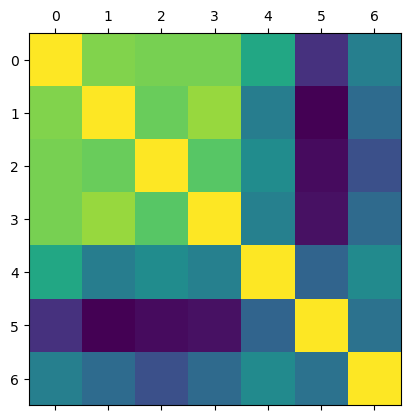

In [35]:
## creating a correlation heatmap 
plt.matshow(corr_mat.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

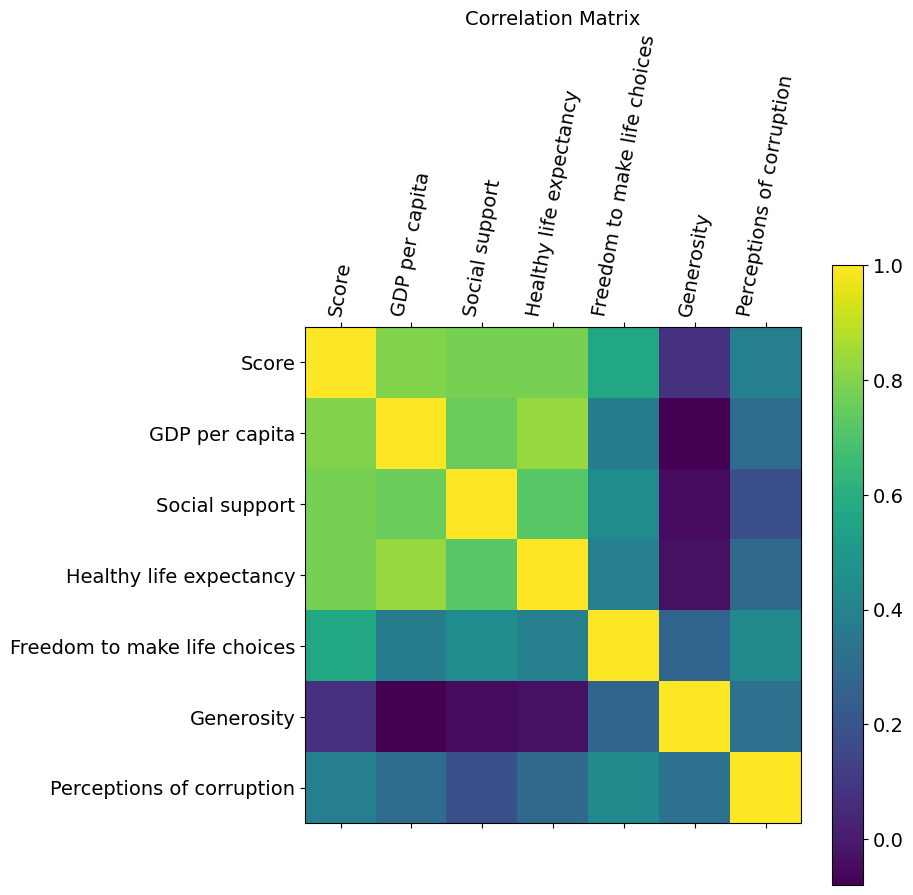

In [37]:
## cleaning the graph to make it more readable 
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(corr_mat.corr(), fignum=f.number) # type of plot
plt.xticks(range(corr_mat.shape[1]), corr_mat.columns, fontsize=14, rotation=80) # x axis labels
plt.yticks(range(corr_mat.shape[1]), corr_mat.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

The heatmap provides insight into the correlation between the different variables in the dataset. At a quick glance we can verify which variable has a positive/negative correlation

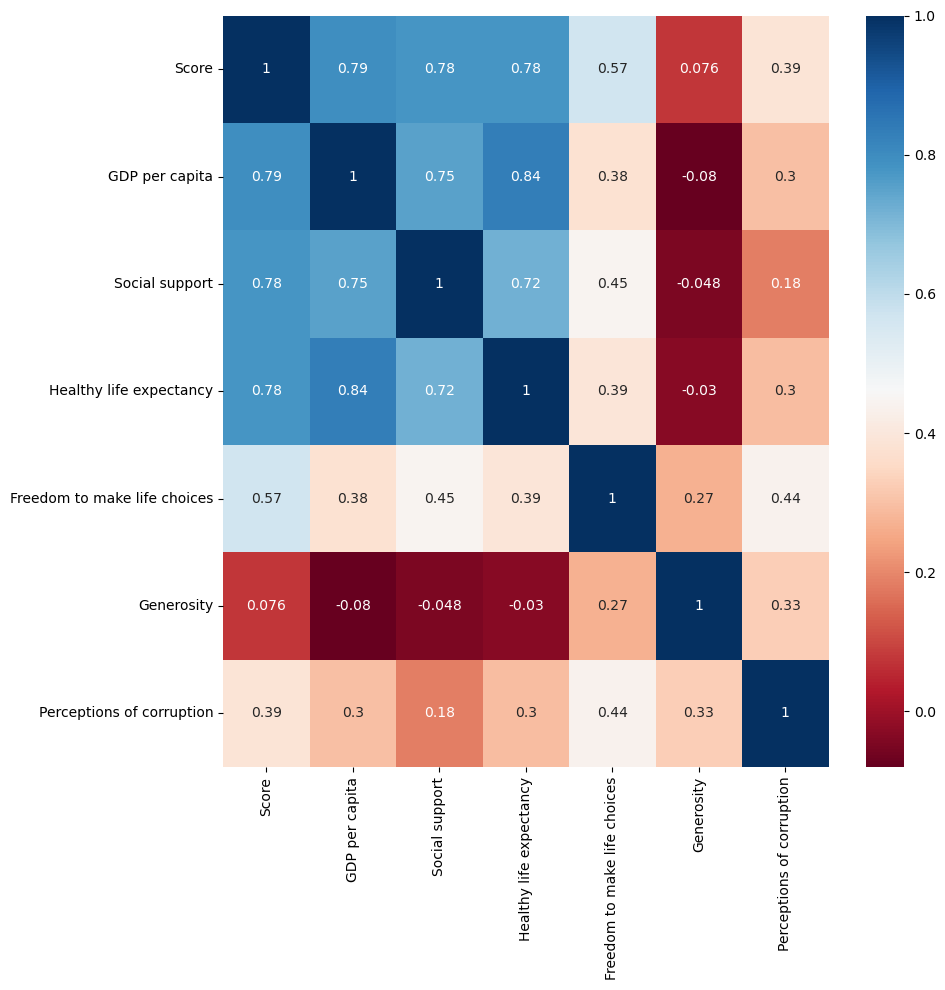

In [40]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(corr_mat.corr(), annot = True, ax = ax, cmap= "RdBu") 
plt.tight_layout()
plt.savefig('Heat_correlation', dpi=300, bbox_inches='tight')

The heatmap provides an extra layer of information for our analysis. We are able to see GDP, social support & healthy life expectany provide a positive effect on the level of happiness for a country.

### 4. Scatterplots

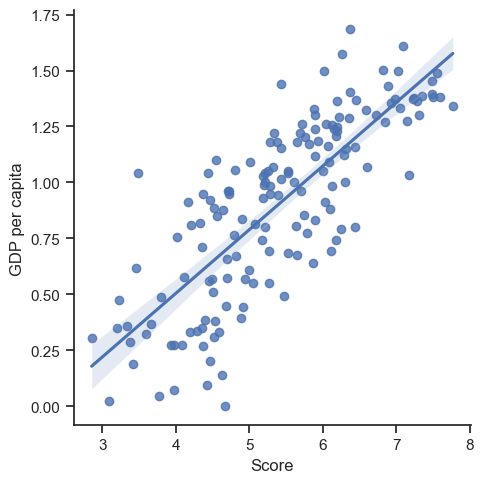

In [87]:
# Create a scatterplot for the happiness score and GDP per capita

sns.lmplot(x = 'Score' , y = 'GDP per capita', data = corr_mat)

There is a strong positive correlation between GDP per capita and the level of happiness for each country

### 5. Pair plots

In [48]:
corr_mat.columns.tolist()

['Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [50]:
### creating a subset for the pair plot 

sub= corr_mat[['Score','GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
plt.tight_layout()
plt.savefig('Pair_plot_correlation', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

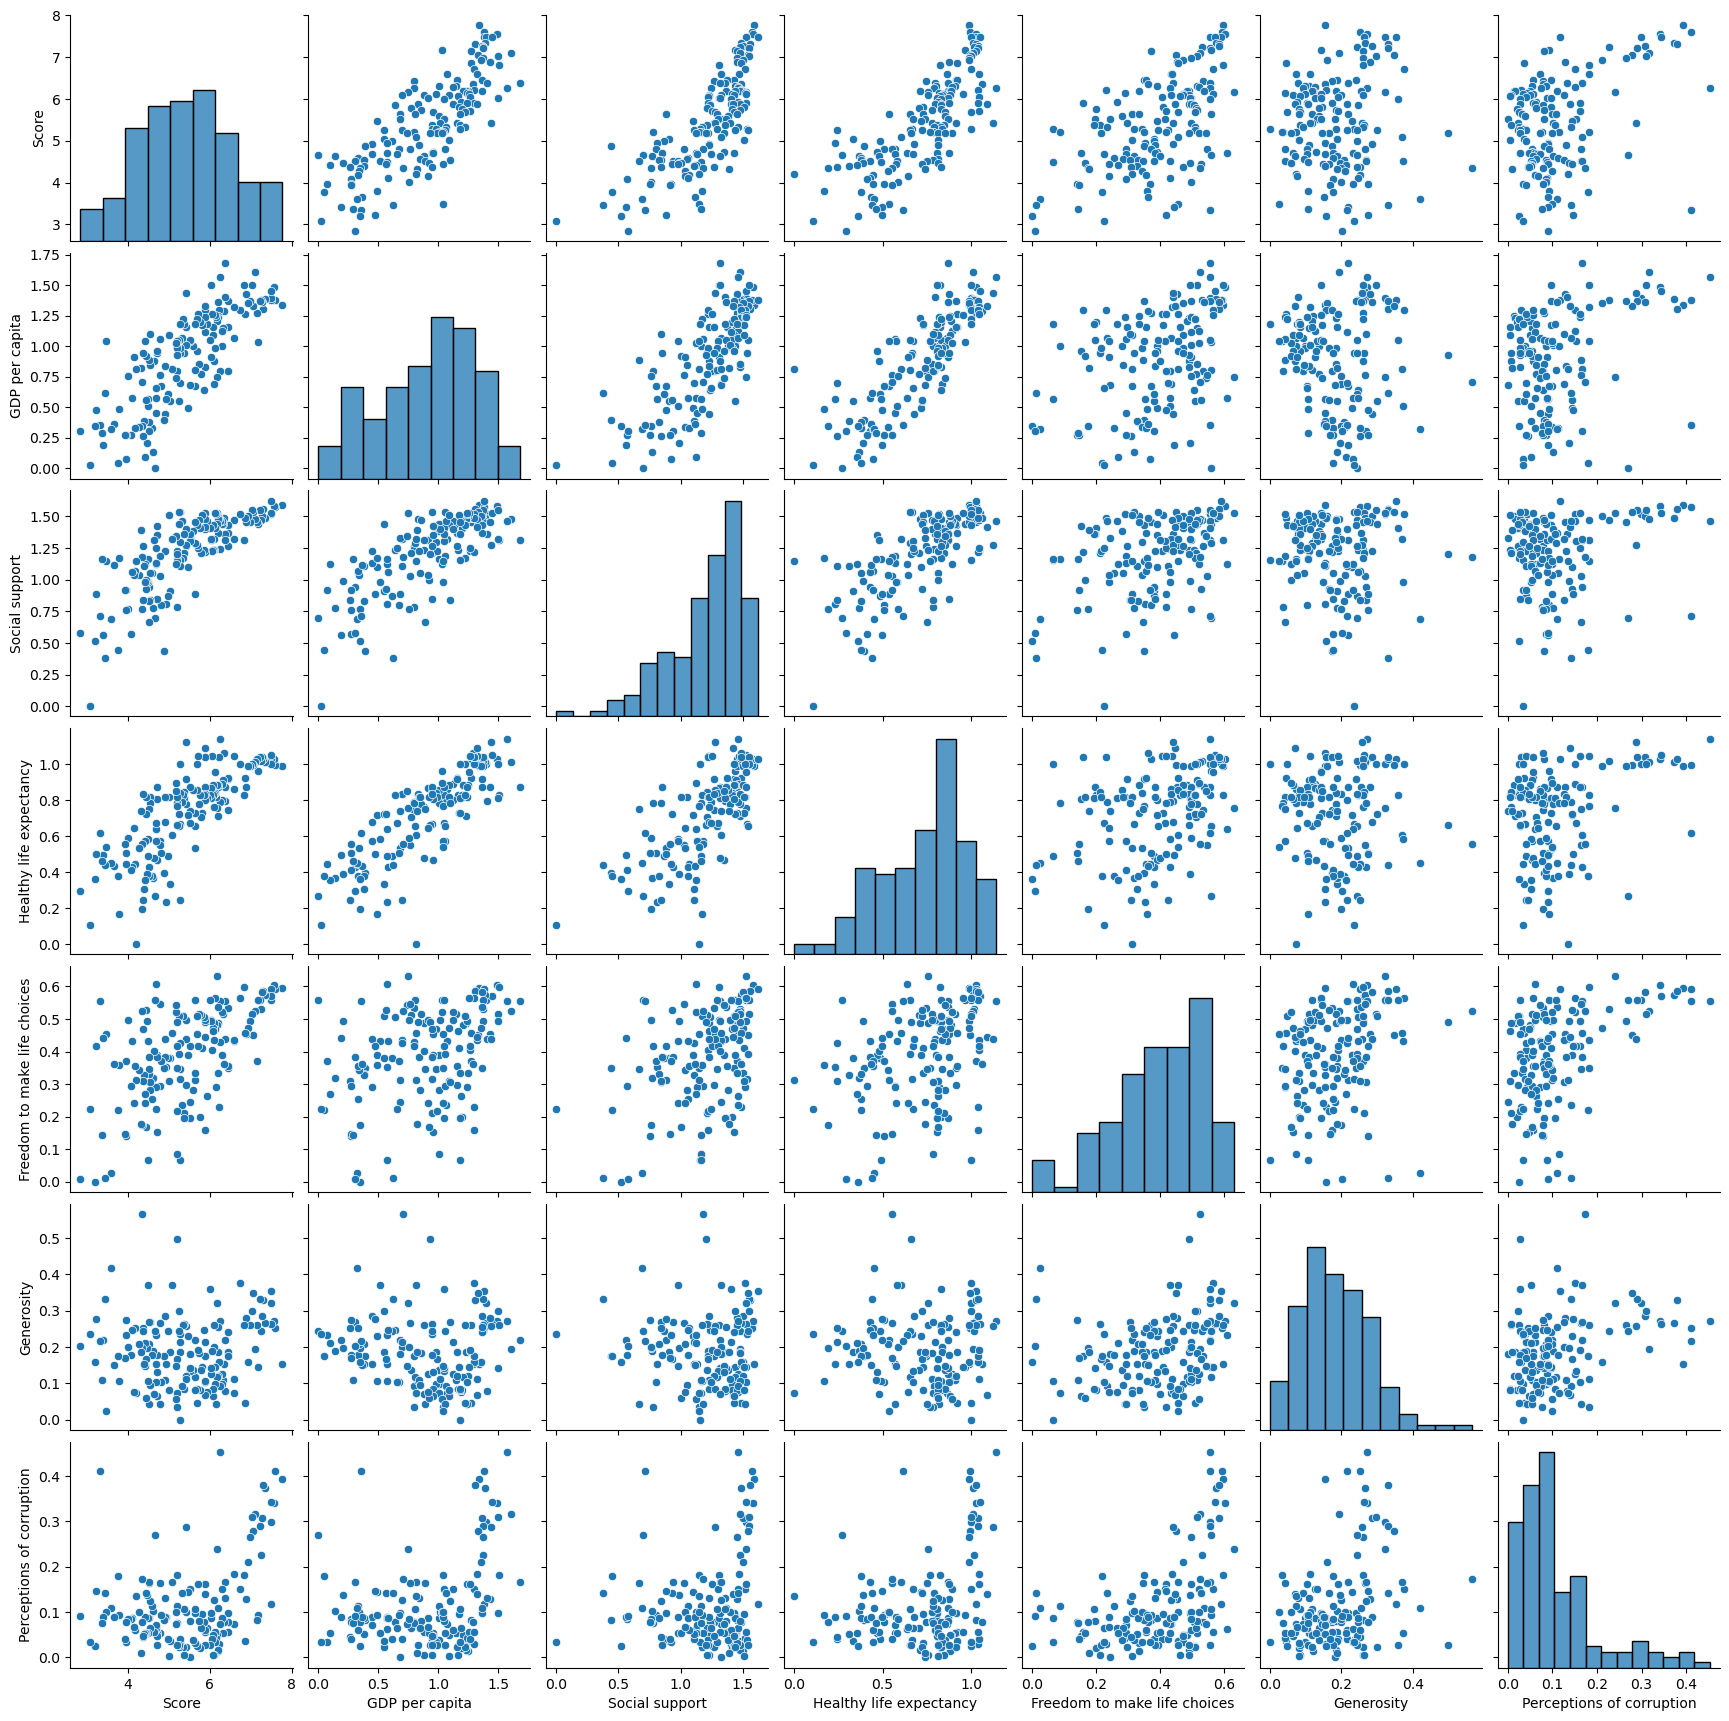

In [52]:
pairplot=sns.pairplot(sub)

The pair plot provides further evidence of the positive relationship between the happiness score and GDP, social support and healthy life expectancy. We can also see the negative affect the perception of corruption and generosity has on the happoness score

### 6. Categorical Plots

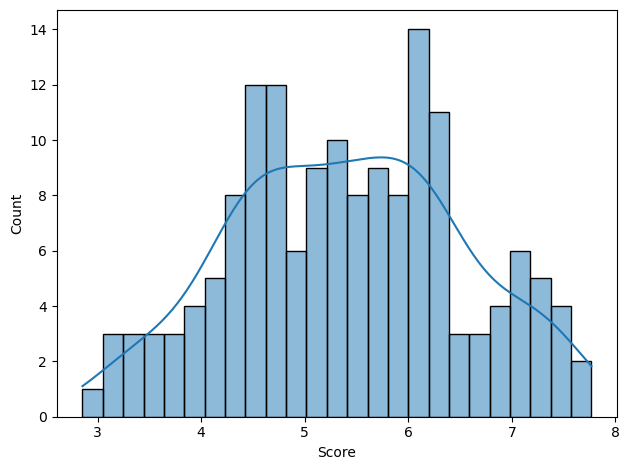

In [56]:
sns.histplot(corr_mat['Score'], bins = 25, kde = True)
plt.tight_layout()
plt.savefig('Score_categorical_plot', dpi=300, bbox_inches='tight')

In [58]:
# finding the min and max of the happiness score

corr_mat.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [60]:
corr_mat.loc[corr_mat['Score'] <=4, 'happiness_level'] = 'Low'

In [62]:
corr_mat.loc[(corr_mat['Score'] >= 5) & (corr_mat['Score'] <= 6), 'happiness_level'] = 'Medium'

In [64]:
corr_mat.loc[corr_mat['Score'] > 6, 'happiness_level'] = 'High'

In [66]:
corr_mat['happiness_level'].value_counts(dropna = False)

happiness_level
High      52
Medium    45
NaN       43
Low       16
Name: count, dtype: int64

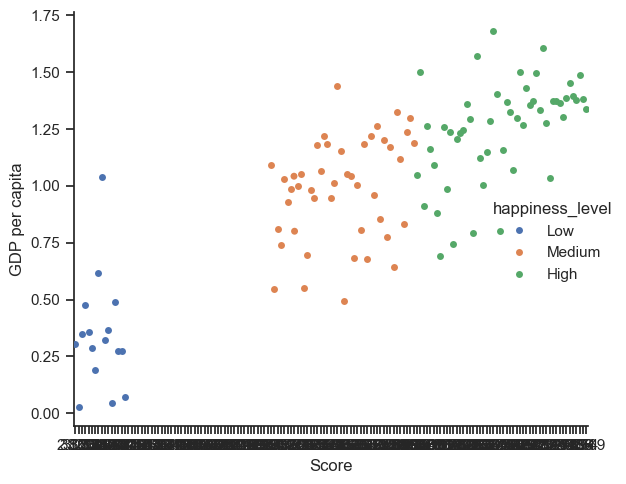

In [68]:
sns.set(style="ticks")
sns.catplot(x="Score", y="GDP per capita", hue="happiness_level", data=corr_mat)
plt.tight_layout()
plt.savefig('Score_GDP_Scatter', dpi=300, bbox_inches='tight')

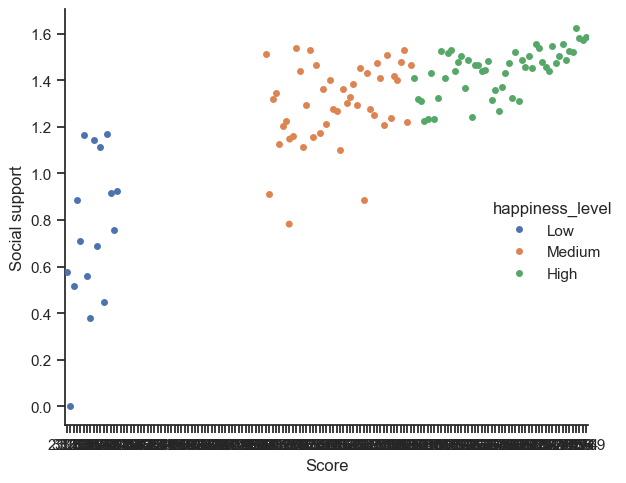

In [78]:
sns.set(style="ticks")
sns.catplot(x="Score", y="Social support", hue="happiness_level", data=corr_mat)
plt.tight_layout()
plt.savefig('Score_social_Scatter', dpi=300, bbox_inches='tight')

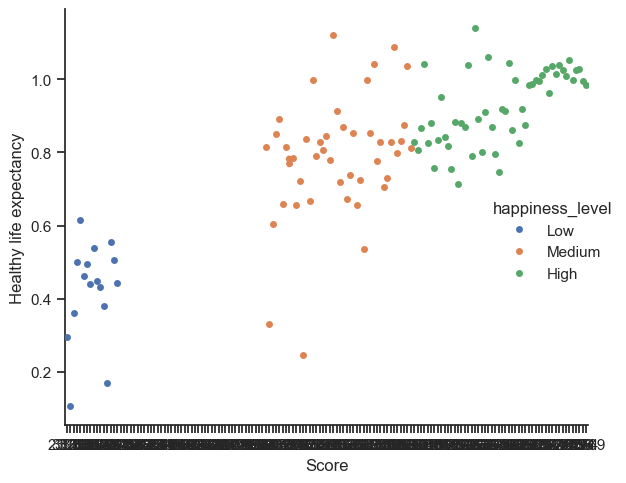

In [80]:
sns.set(style="ticks")
sns.catplot(x="Score", y="Healthy life expectancy", hue="happiness_level", data=corr_mat)
plt.tight_layout()
plt.savefig('Score_life_Scatter', dpi=300, bbox_inches='tight')

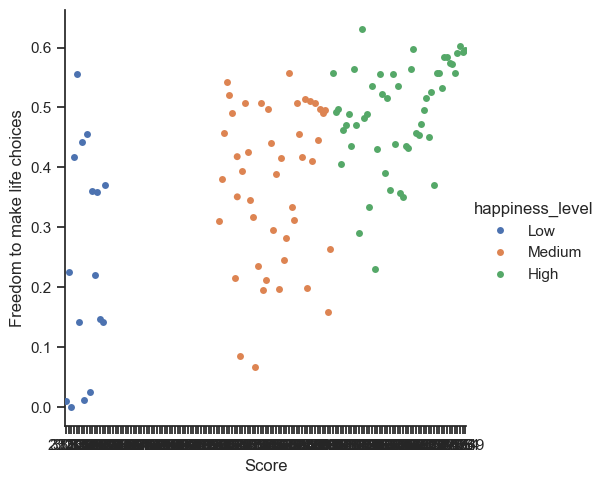

In [71]:
sns.set(style="ticks")
sns.catplot(x="Score", y="Freedom to make life choices", hue="happiness_level", data=corr_mat)

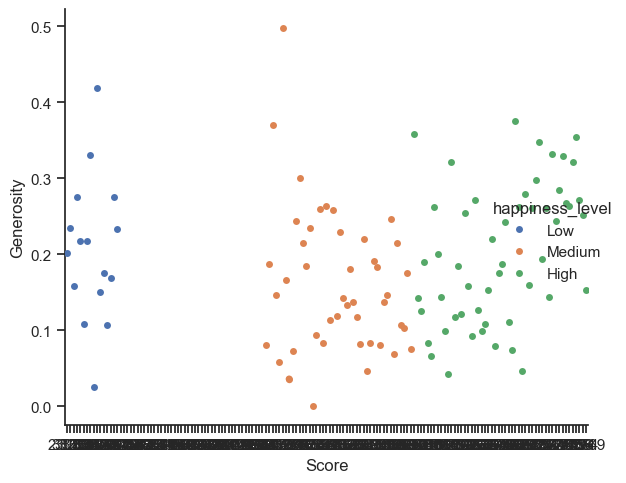

In [82]:
sns.set(style="ticks")
sns.catplot(x="Score", y="Generosity", hue="happiness_level", data=corr_mat)
plt.tight_layout()
plt.savefig('Score_generosity_Scatter', dpi=300, bbox_inches='tight')

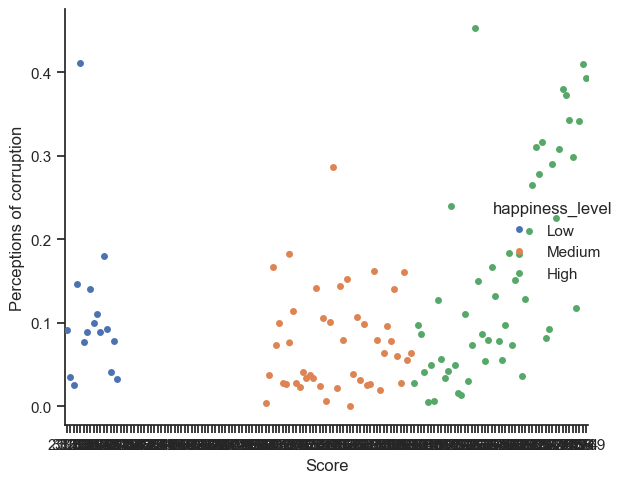

In [84]:
sns.set(style="ticks")
sns.catplot(x="Score", y="Perceptions of corruption", hue="happiness_level", data=corr_mat)
plt.tight_layout()
plt.savefig('Score_corruption_Scatter', dpi=300, bbox_inches='tight')

### 7. Analysis/Research Question

**Score/happiness vs GDP**
<BR> - The is a strong positive correlation between happiness and GDP per capita, This is indicates the higher the GDP for a country the happier the citizens.
<BR> -  We also need to take into consideration there are some outliers with some countries having a low GDP per capita however have a higher level of happiness.
<BR>
<BR>
**Score/happiness vs Social support**
<BR> -  Social support follows a similar trends compared to GDP, An increase in social support has a strong positive correlation with the level is happiness. 
<BR> - The Scatterplot provides evidence countries need to increase the levels of support they provide to their citizens, as this has a high impact on the levels of happiness of the citizens.
<BR>
<BR>
**Score/happiness vs Perceptions of corruption**
<BR> - There is a negative correlation betweent the perceived levels of corruption and happiness.
<BR> - lower levels of corruptions indicates a higher level of happiness within a country
<BR>
<BR>
**Score/happiness vs Generosity**
<BR> - Suprising there is no correlation between generosity and happiness. Generosity has no effect on the levels of happiness.